# Name(s)
**PUT YOUR FULL NAME(S) HERE**

## Should we grade this notebook? (Answer yes or no)

???YES OR NO???

**Instructions:** Pair programming assignment. Submit only a single notebook unless you deviate significantly after lab on Thursday. If you submit individually, make sure you indicate who you worked with originally. Make sure to include your first and last names. For those students who push to individual repos but still work in groups, please indicate which notebook should be graded.

# Choosing and Using Clustering

## Lab Assignment

This is a pair programming assignment. I strongly
discourage individual work for this (and other team/pair programming) lab(s), even if you think you can do it
all by yourself. Also, this is a pair programming assignment, not a ”work in teams of two” assignment. Pair
programming requires joint work on all aspects of the project without delegating portions of the work to individual
1
team members. For this lab, I want all your work — discussion, software development, analysis of the results,
report writing — to be products of joint work.
Students enrolled in the class can pair with other students enrolled in the class. Students on the waitlist can
pair with other students on the waitlists. In the cases of ”odd person out” situations, a team of three people can
be formed, but that team must (a) ask and answer one additional question, and (b) work as a pair would, without
delegation of any work off-line.

## At the end of this lab, I should be able to
* Formulate your own clustering questions and understand how you can go about getting answers
* Understand how to select a clustering algorithm for your task

## Our data
We will be using a well known housing dataset from Boston.
<pre>
The Boston house-price data of Harrison, D. and Rubinfeld, D.L. 'Hedonic
 prices and the demand for clean air', J. Environ. Economics & Management,
 vol.5, 81-102, 1978.   Used in Belsley, Kuh & Welsch, 'Regression diagnostics
 ...', Wiley, 1980.   N.B. Various transformations are used in the table on
 pages 244-261 of the latter.

 Variables in order:
 CRIM     per capita crime rate by town
 ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
 INDUS    proportion of non-retail business acres per town
 CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
 NOX      nitric oxides concentration (parts per 10 million)
 RM       average number of rooms per dwelling
 AGE      proportion of owner-occupied units built prior to 1940
 DIS      weighted distances to five Boston employment centres
 RAD      index of accessibility to radial highways
 TAX      full-value property-tax rate per $10,000
 PTRATIO  pupil-teacher ratio by town
 B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
 LSTAT    % lower status of the population
 MEDV     Median value of owner-occupied homes in $1000's
</pre>

In [2]:
# We need a better version
!pip install -U scikit-learn

Requirement already up-to-date: scikit-learn in /opt/conda/lib/python3.7/site-packages (0.22.1)
You should consider upgrading via the 'pip install --upgrade pip' command.


In [3]:
import pandas as pd
df = pd.read_csv("housing/boston_fixed.csv")
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


**Exercise 1.** Read the descriptions of the features above, and come up with 2-3 reasonable questions with corresponding methods to test them. The only one that you cannot write, is the one we will do as a class, which I use as an example here:

Example questions: 
* Are there any definitive subgroupings (i.e., clusters) of towns in the dataset? 
* How many (if any) groups/clusters are there in the dataset?
* Are there any clusters of median value of owner-occupied homes? And if so, can we use the rest of the data to predict these clusters? 

Methodology:
1. Empirically determine the best clustering method from our known list of kmeans and hiearchical clustering.
2. Using this best clustering model, visualize the data using PCA
3. Apply clustering algorithms to MEDV and then use random forest to predict these clusters presenting the evaluation.

**YOUR SOLUTION HERE**

**For the next few questions, we will lean heavily upon sklearn and the built-in models.**

**Exercises 2-9**
Are there any clusters of towns? Use the following methodology:

1. Empirically determine the best clustering method from our known list kmeans and hiearchical clustering
2. Using this best clustering, visualize the data using PCA

### Code to get you started
I included all of the imports I used in this section right here. I encourage you to take a look at their documentation. I also encourage you to try and mess with the parameters yourself and see if you can come up with better combinations. Finally, you can completely break the overall flow of what I've laid out as long as you accomplish the main goals.

In [4]:
# this is for plotting
%matplotlib inline 

import copy

# our standard imports
import numpy as np
import pandas as pd

# of course we need to be able to split into training and test
from sklearn.model_selection import train_test_split

# This is where we can get our models
from sklearn.ensemble import RandomForestClassifier

from sklearn.decomposition import PCA

from sklearn.preprocessing import StandardScaler

from sklearn.cluster import KMeans

from scipy.cluster.hierarchy import dendrogram
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import classification_report

**Exercise 2** A lot of methods depend on the scaling of data, so we need to decide on a scaling method. We will use the autoscaling method described in sklearn as:
"The standard score of a sample x is calculated as:

z = (x - u) / s

where u is the mean of the training samples or zero if with_mean=False, and s is the standard deviation of the training samples or one if with_std=False." - <a href="https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html">Source</a>

For this exercise, scale ``df`` using the StandardScaler in sklearn. For consistency with later code, call this new scaled dataframe ``X``.

In [5]:
# YOUR SOLUTION HERE
X = pd.DataFrame(X,columns=df.columns)
X

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,-0.419782,0.284830,-1.287909,-0.272599,-0.144217,0.413672,-0.120013,0.140214,-0.982843,-0.666608,-1.459000,0.441052,-1.075562,0.159686
1,-0.417339,-0.487722,-0.593381,-0.272599,-0.740262,0.194274,0.367166,0.557160,-0.867883,-0.987329,-0.303094,0.441052,-0.492439,-0.101524
2,-0.417342,-0.487722,-0.593381,-0.272599,-0.740262,1.282714,-0.265812,0.557160,-0.867883,-0.987329,-0.303094,0.396427,-1.208727,1.324247
3,-0.416750,-0.487722,-1.306878,-0.272599,-0.835284,1.016303,-0.809889,1.077737,-0.752922,-1.106115,0.113032,0.416163,-1.361517,1.182758
4,-0.412482,-0.487722,-1.306878,-0.272599,-0.835284,1.228577,-0.511180,1.077737,-0.752922,-1.106115,0.113032,0.441052,-1.026501,1.487503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,-0.413229,-0.487722,0.115738,-0.272599,0.158124,0.439316,0.018673,-0.625796,-0.982843,-0.803212,1.176466,0.387217,-0.418147,-0.014454
502,-0.415249,-0.487722,0.115738,-0.272599,0.158124,-0.234548,0.288933,-0.716639,-0.982843,-0.803212,1.176466,0.441052,-0.500850,-0.210362
503,-0.413447,-0.487722,0.115738,-0.272599,0.158124,0.984960,0.797449,-0.773684,-0.982843,-0.803212,1.176466,0.441052,-0.983048,0.148802
504,-0.407764,-0.487722,0.115738,-0.272599,0.158124,0.725672,0.736996,-0.668437,-0.982843,-0.803212,1.176466,0.403225,-0.865302,-0.057989


**Exercise 3** We now need to take a look at our data, but it is too many dimensions! For this task we need to reduce the dimension. Reduce the dataset down to two dimensions using PCA. <a href="https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html">Here is a link to the documentation.</a> Store the transformed data in a variable called ``X_pca``.

,PC1 (0.47),PC2 (0.12)
0,-2.087344,0.492880
1,-1.373382,-0.170915
2,-2.376553,0.914006
3,-2.837779,0.194832
4,-2.772915,0.433250
...,...,...
501,-0.302820,0.142747
502,-0.043395,-0.115691
503,-0.368190,0.823165
504,-0.264317,0.540018


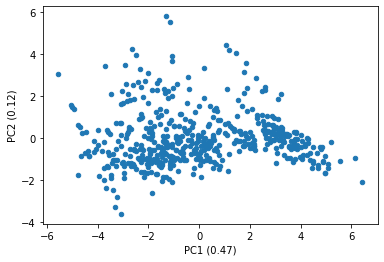

In [6]:
# YOUR SOLUTION HERE
columns=["PC1 (%0.2f)"%pca.explained_variance_ratio_[0],"PC2 (%0.2f)"%pca.explained_variance_ratio_[1]]
X_pca = pd.DataFrame(X_pca,columns=columns)
display(X_pca)
X_pca.plot.scatter(x=columns[0],y=columns[1])

**Exercise 4** Our next major step is to apply kmeans to our data ``X`` (do NOT cluster on ``X_pca``) for several different values of ``k``. We'll compare these results later. The documentation for kmeans is <a href="https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html">here</a>. Fill in the loop that constructs the kmeans models for each of the values of ``k`` specified below.

In [7]:
range_n_clusters = [2, 3, 4, 5, 6]
kmeans_models = {}
for n_clusters in range_n_clusters:
kmeans_models

{2: KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
        n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
        random_state=10, tol=0.0001, verbose=0),
 3: KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
        n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
        random_state=10, tol=0.0001, verbose=0),
 4: KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
        n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
        random_state=10, tol=0.0001, verbose=0),
 5: KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
        n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
        random_state=10, tol=0.0001, verbose=0),
 6: KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
        n_clusters=6, n_init=10, n_jobs=None, precompute_distances='auto',
        random_state=10, tol=0.0001, verbose=0)}

**Exercise 5** Now we need assign cluster labels to each sample in our dataset. Fill in the following to accomplish this:

In [8]:
cluster_labels = {}
for n_clusters in range_n_clusters:
cluster_labels = pd.DataFrame(cluster_labels)
cluster_labels

,2,3,4,5,6
0,1,0,1,0,2
1,1,0,0,0,5
2,1,0,1,0,2
3,1,2,1,0,2
4,1,2,1,0,2
...,...,...,...,...,...
501,1,0,0,0,5
502,1,0,0,0,5
503,1,0,0,0,5
504,1,0,0,0,5


**Exercise 6** We now have 5 different clusterings of our data. We need to know which one of these is the best. Let's visualize the clusters (k=2 and k=3) using the cluster_labels and PCA. <a href="https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.scatter.html">Here is some documentation on how to set the color.</a>

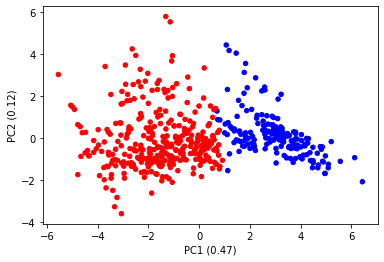

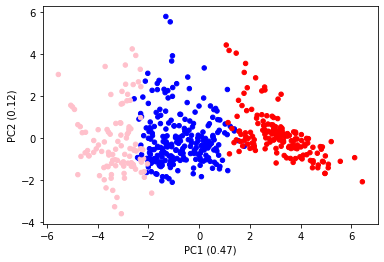

In [9]:
colorings = {}
colorings[2] = cluster_labels[2].map({0: "Blue", 1: "Red"}) # This is a new pandas command for us that maps all 0 values to Blue, etc
colorings[3] = cluster_labels[3].map({0: "Blue", 1: "Red",2: "Pink"}) # This is a new pandas command for us that maps all 0 values to Blue, etc

**Exercise 7** OK. We to start assembling information we need to make a decision. There are many ways to evaluate clusters, but one of the best visual ways is through a silhouette plot. Here is an excerpt of the documentation from sklearn:
"Silhouette analysis can be used to study the separation distance between the resulting clusters. The silhouette plot displays a measure of how close each point in one cluster is to points in the neighboring clusters and thus provides a way to assess parameters like number of clusters visually. This measure has a range of [-1, 1].

Silhouette coefficients (as these values are referred to as) near +1 indicate that the sample is far away from the neighboring clusters. A value of 0 indicates that the sample is on or very close to the decision boundary between two neighboring clusters and negative values indicate that those samples might have been assigned to the wrong cluster." - <a href="https://scikit-learn.org/dev/auto_examples/cluster/plot_kmeans_silhouette_analysis.html#example-cluster-plot-kmeans-silhouette-analysis-py">Source</a>

For this exercise, I'm going to give you the code that produces the silhouette plots. It's long because it is just plotting related code. What I ask is that you use this plot and tell us what the best k value, what is the corresponding silhoutte score, and explain the justification for this decision. In other words, use my output and make the decision.

For n_clusters = 2 The average silhouette_score is : 0.35010701730151716
For n_clusters = 3 The average silhouette_score is : 0.2521566794454385
For n_clusters = 4 The average silhouette_score is : 0.26318940333511187
For n_clusters = 5 The average silhouette_score is : 0.2672220212413927
For n_clusters = 6 The average silhouette_score is : 0.26809300745590947


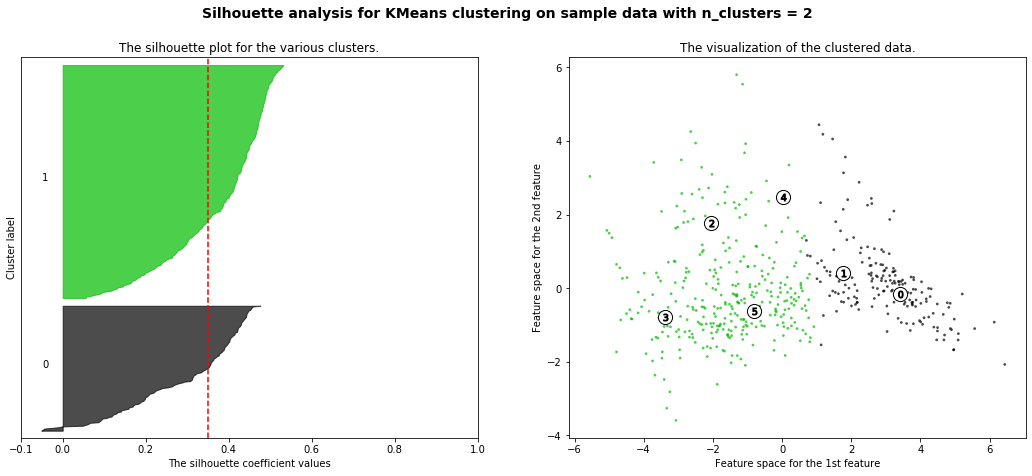

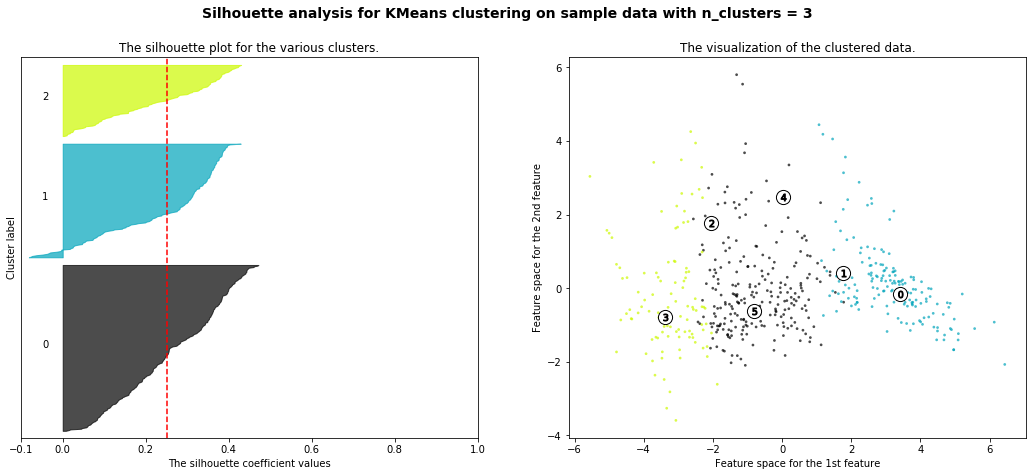

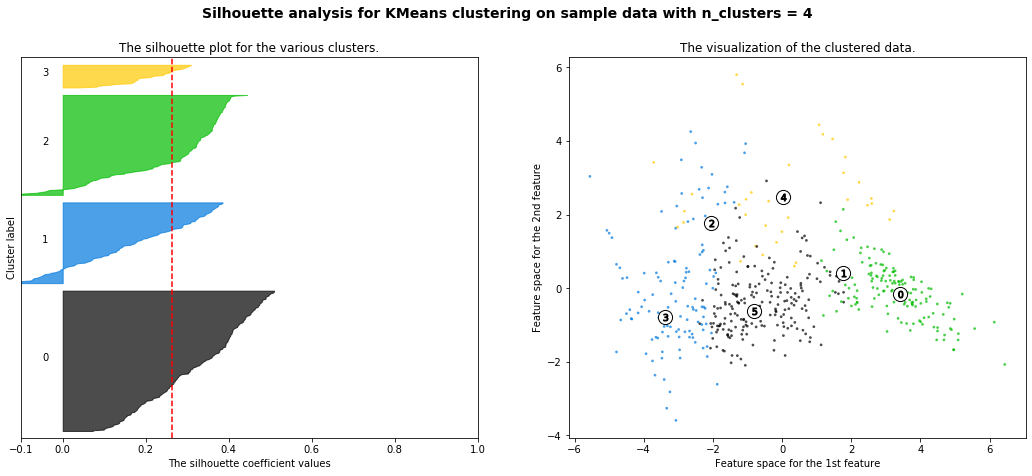

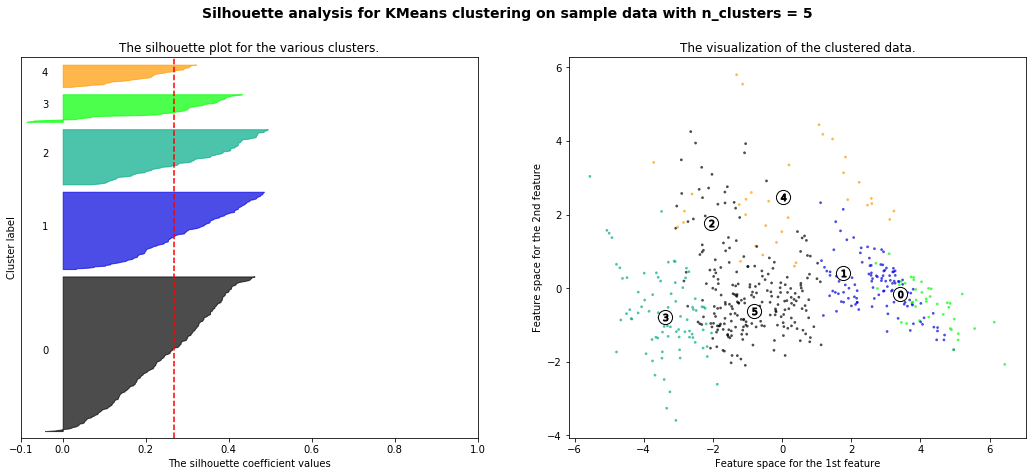

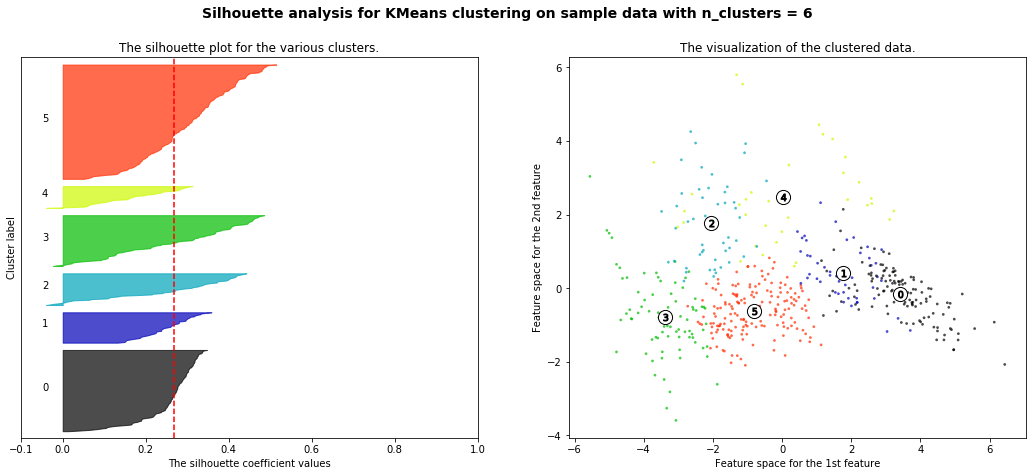

In [10]:
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels[n_clusters])
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels[n_clusters])

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels[n_clusters] == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels[n_clusters].astype(float) / n_clusters)
    ax2.scatter(X_pca.values[:, 0], X_pca.values[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    centers_pca = pca.transform(centers)
    ax2.scatter(centers_pca[:, 0], centers_pca[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers_pca):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

**Exercise 8** That was kmeans clustering. What about hiearchical clustering? For this excercise, use the same ``X`` data and create a dendrogram using hiearchical clustering. <a href="https://scikit-learn.org/stable/auto_examples/cluster/plot_agglomerative_dendrogram.html">Here is a link to a sample</a>. After you dig into this code, answer what kind of linkage method was used (answer with more than just the name)?

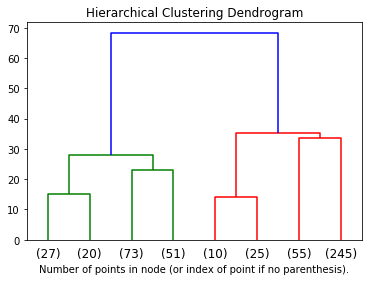

In [11]:
# YOUR SOLUTION HERE

**Exercise 9** Now change the linkage method to single linkage, and compare the plots.

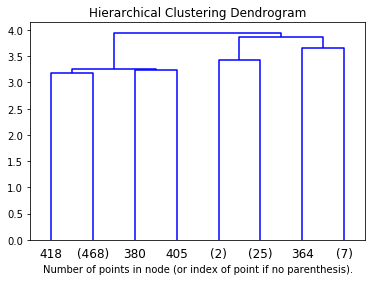

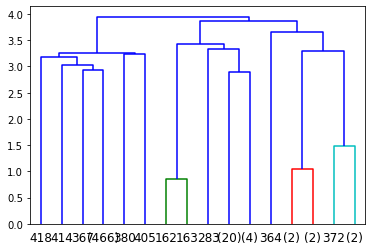

In [12]:
# YOUR SOLUTION HERE

**Exercise 10** Now we are going to switch gears and cluster the ``MEDV`` column. First, create a density plot of ``MEDV``. Make sure you go back to the original dataframe ``df`` at this point.

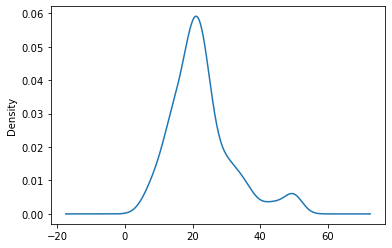

In [13]:
# YOUR SOLUTION HERE

**Exercise 11** To me it looks reasonable that there might be 3 clusters as we have the shoulder sticking out around 30 and the bump at around 50. Using kmeans and k=3, group each town in one of three clusters using the algorithm. 

In [14]:
clusterer = KMeans(n_clusters=3, random_state=10)
# YOUR SOLUTION HERE
labels = clusterer.predict(df[["MEDV"]])
df["y"] = labels
display(df)
df.groupby("y").MEDV.mean()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,y
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0,1
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6,1
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7,2
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4,2
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4,1
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6,1
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9,1
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0,1


y
0    13.463333
1    22.797872
2    39.906757
Name: MEDV, dtype: float64

**Exercise 12** Now construct a model that tries to predict this new class label using the rest of the dataset. Use RandomForestClassifier. Summarize how we are doing on this classification task. Compare how the variable importance plot changed from the regression version (last lab) and this one.

              precision    recall  f1-score   support

           0       0.90      0.83      0.86        53
           1       0.88      0.94      0.91        95
           2       0.94      0.84      0.89        19

    accuracy                           0.89       167
   macro avg       0.91      0.87      0.89       167
weighted avg       0.89      0.89      0.89       167



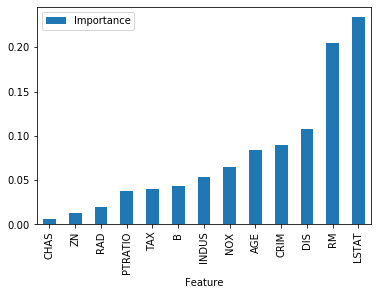

In [15]:
# YOUR SOLUTION HERE
# X_train, X_test, y_train, y_test = train_test_split(???, ???, test_size=0.33, random_state=42)
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))

importances = clf.feature_importances_
importances = pd.DataFrame({'Feature':X_train.columns,'Importance':importances})
importances.sort_values(by='Importance').set_index('Feature').plot.bar()

# YOUR SOLUTION HERE